In [206]:
import torch
import matplotlib.pyplot as plt

# x = torch.rand(5, 3)
# print(x)

In [207]:
# training_data = datasets.FashionMNIST(
#     root="data",
#     train=True,
#     download=True,
#     transform=ToTensor(),
# )

# Calculate the differentiation of at x = 5 or Calculate the slop at x = 5
- define x a tesor
- track requires_grad = True on the tensor
- define the equation, which shows relationship between y and x
- set .backward() method on the y
- x.grad -> returns the slop at x , or differentiation of y w.r.t x , when x = 5

In [173]:
x = torch.tensor(5.)


In [174]:
print(x)

tensor(5.)


In [175]:
x

tensor(5.)

In [176]:
type(x)

torch.Tensor

In [177]:
x.requires_grad = True # Contagiously track gradients through forward pass

In [178]:
x.requires_grad

True

In [179]:
y = x**2

In [180]:
y.backward() #use autodiff

In [181]:
x.grad

tensor(10.)

## The Line Equation as a Tensor Graph

<!-- <div>
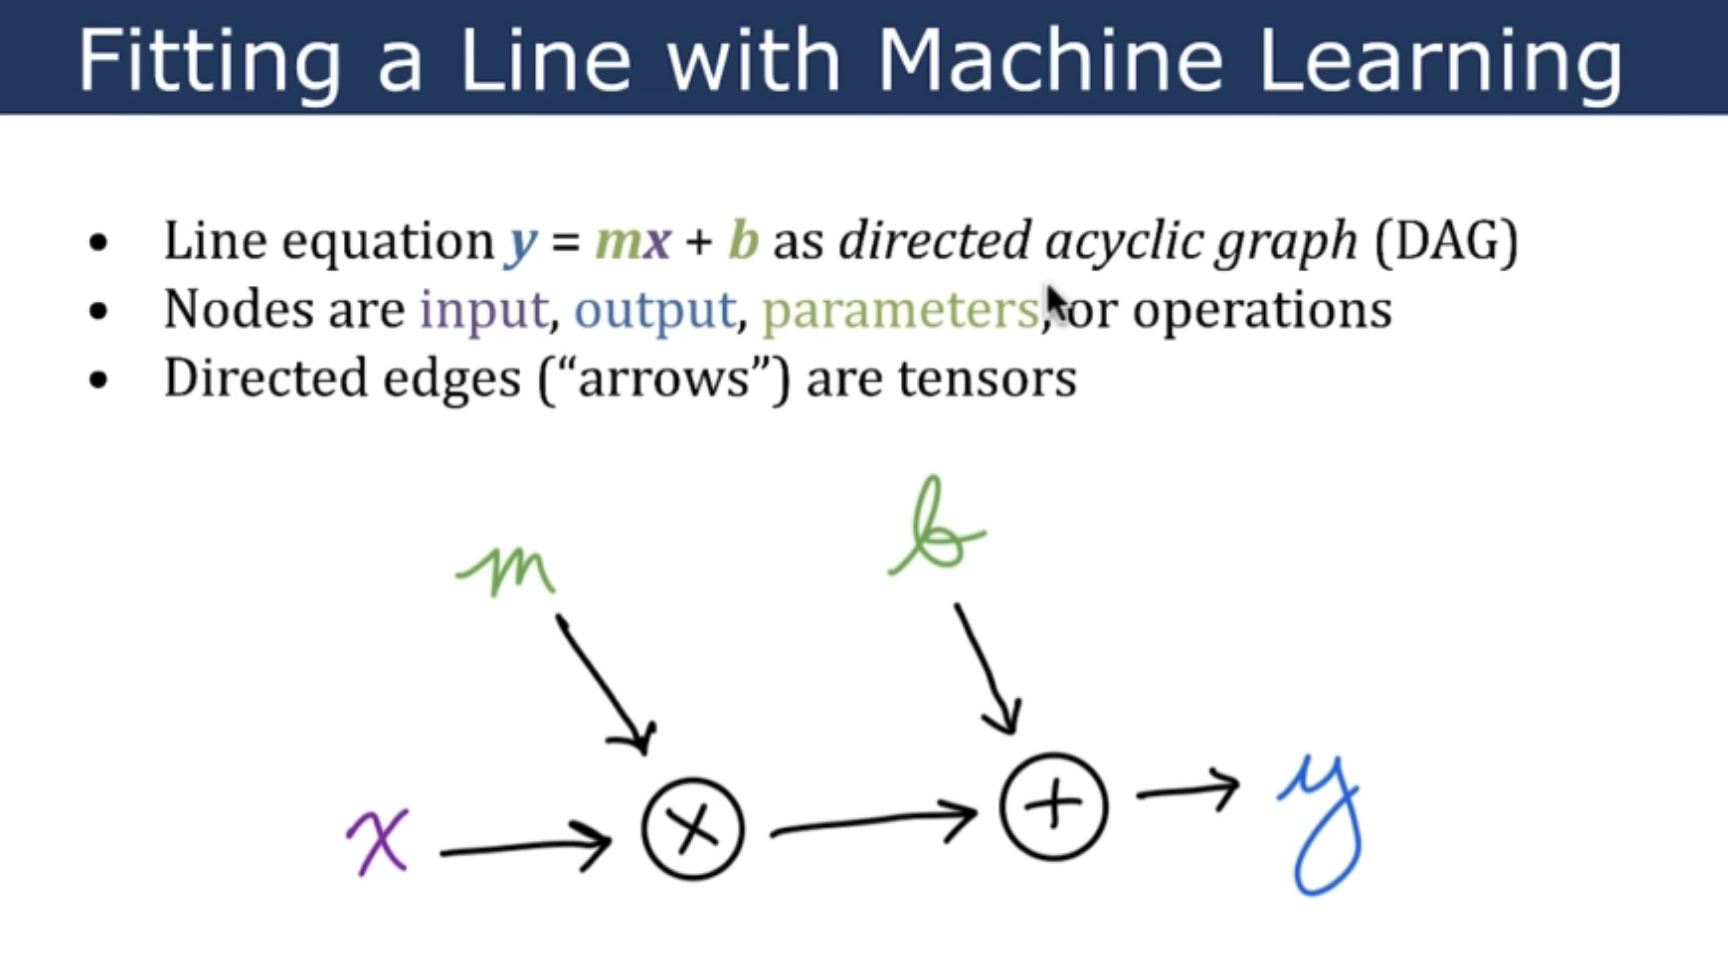
</div> -->

<div>
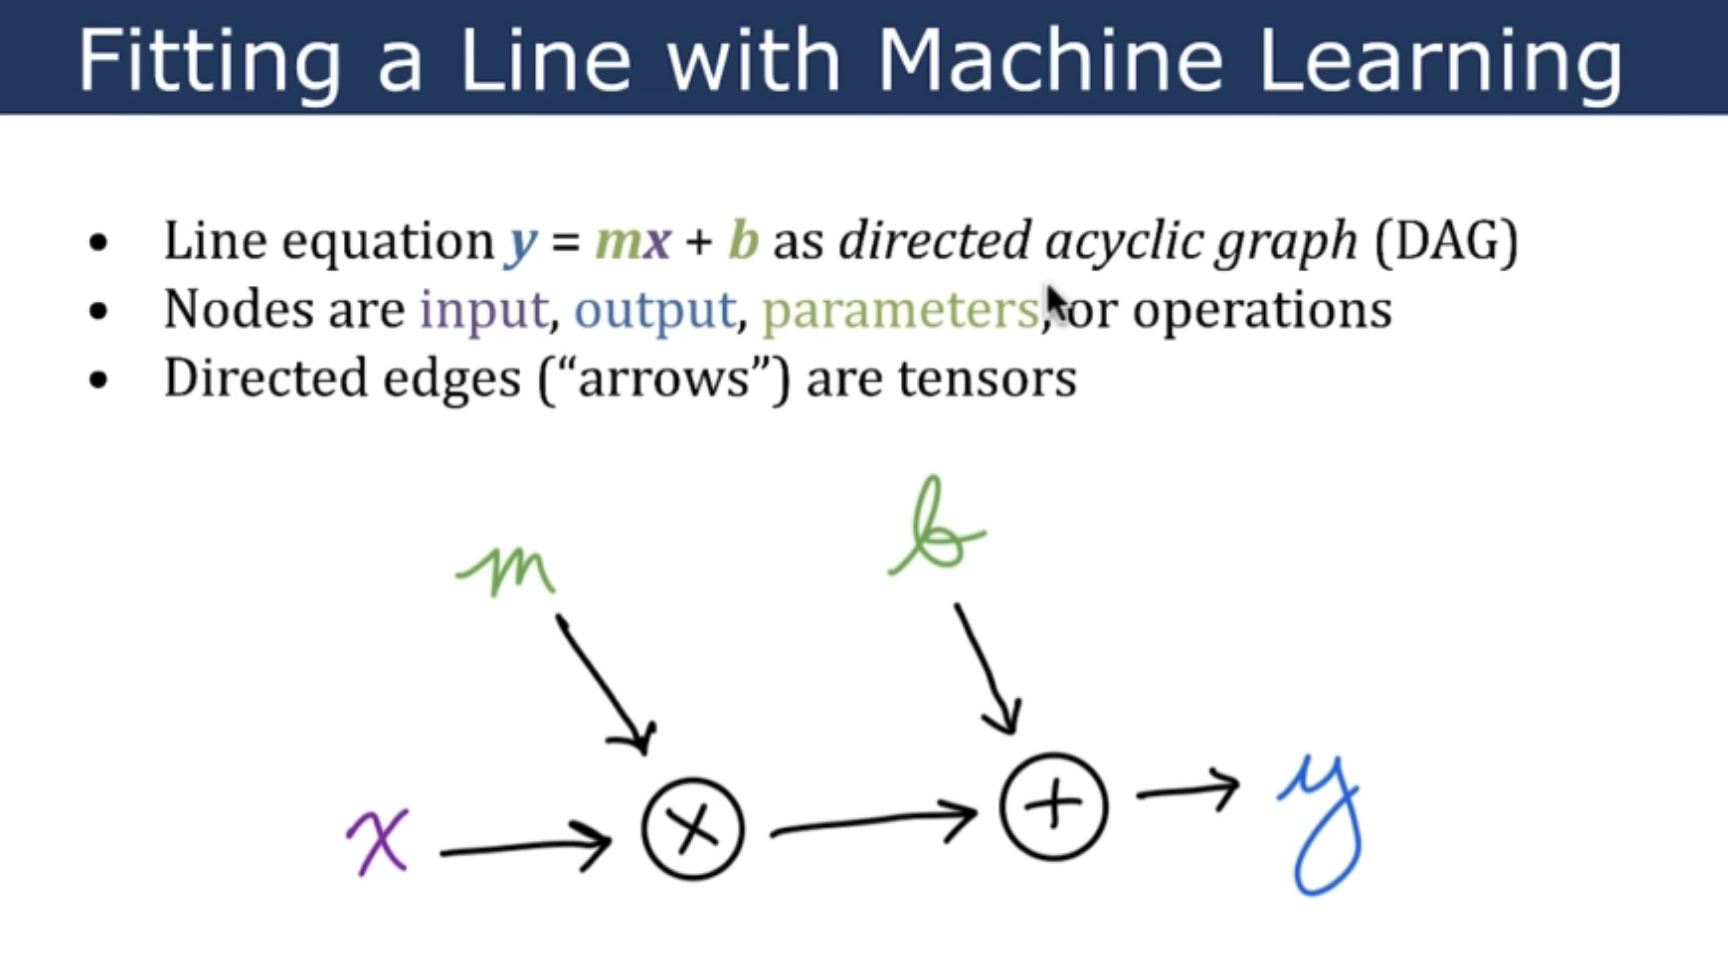
</div>

### Regression in PyTorch

We use the pytorch automatic differentiation libarary to fit a straight line to fit to the data points, Thus we use the calculus to solve the same regression problem that we solved the Moore- Pensrose Pseudoinverse to solve in the Linear Algebra II notebook

In [182]:
x = torch.tensor([0,1,2,3,4,5,6,7.]) # Dosage of Drug for Treating Alzheimer's disease

In [183]:
x

tensor([0., 1., 2., 3., 4., 5., 6., 7.])

y values were created using the equation of a line y = mx + b. This way, We know what the model parameters to be learned are, say , m = -0.5 and b = 2. Random, Normally distrubuted noise has been added to simulate sampling error

In [184]:
y = -0.5*x + 2 + torch.normal(mean=torch.zeros(8), std=0.2)

In [185]:
y

tensor([ 1.9926,  1.1872,  0.9213,  0.5815,  0.0912, -0.6995, -1.0933, -1.4970])

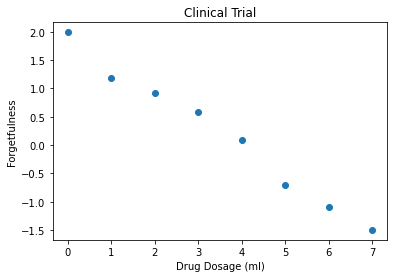

In [186]:
# Check Y vs X replationship, we have created some error with value of the x. 
#  Draw Scater plot for given x and y points, Obtained above, Now we want to calcualte a line using the regression Method
#  to find the line which best fit the below data points. 
fig, ax = plt.subplots()
plt.title("Clinical Trial")
plt.xlabel("Drug Dosage (ml)")
plt.ylabel("Forgetfulness")
ax.scatter(x,y)



<!-- 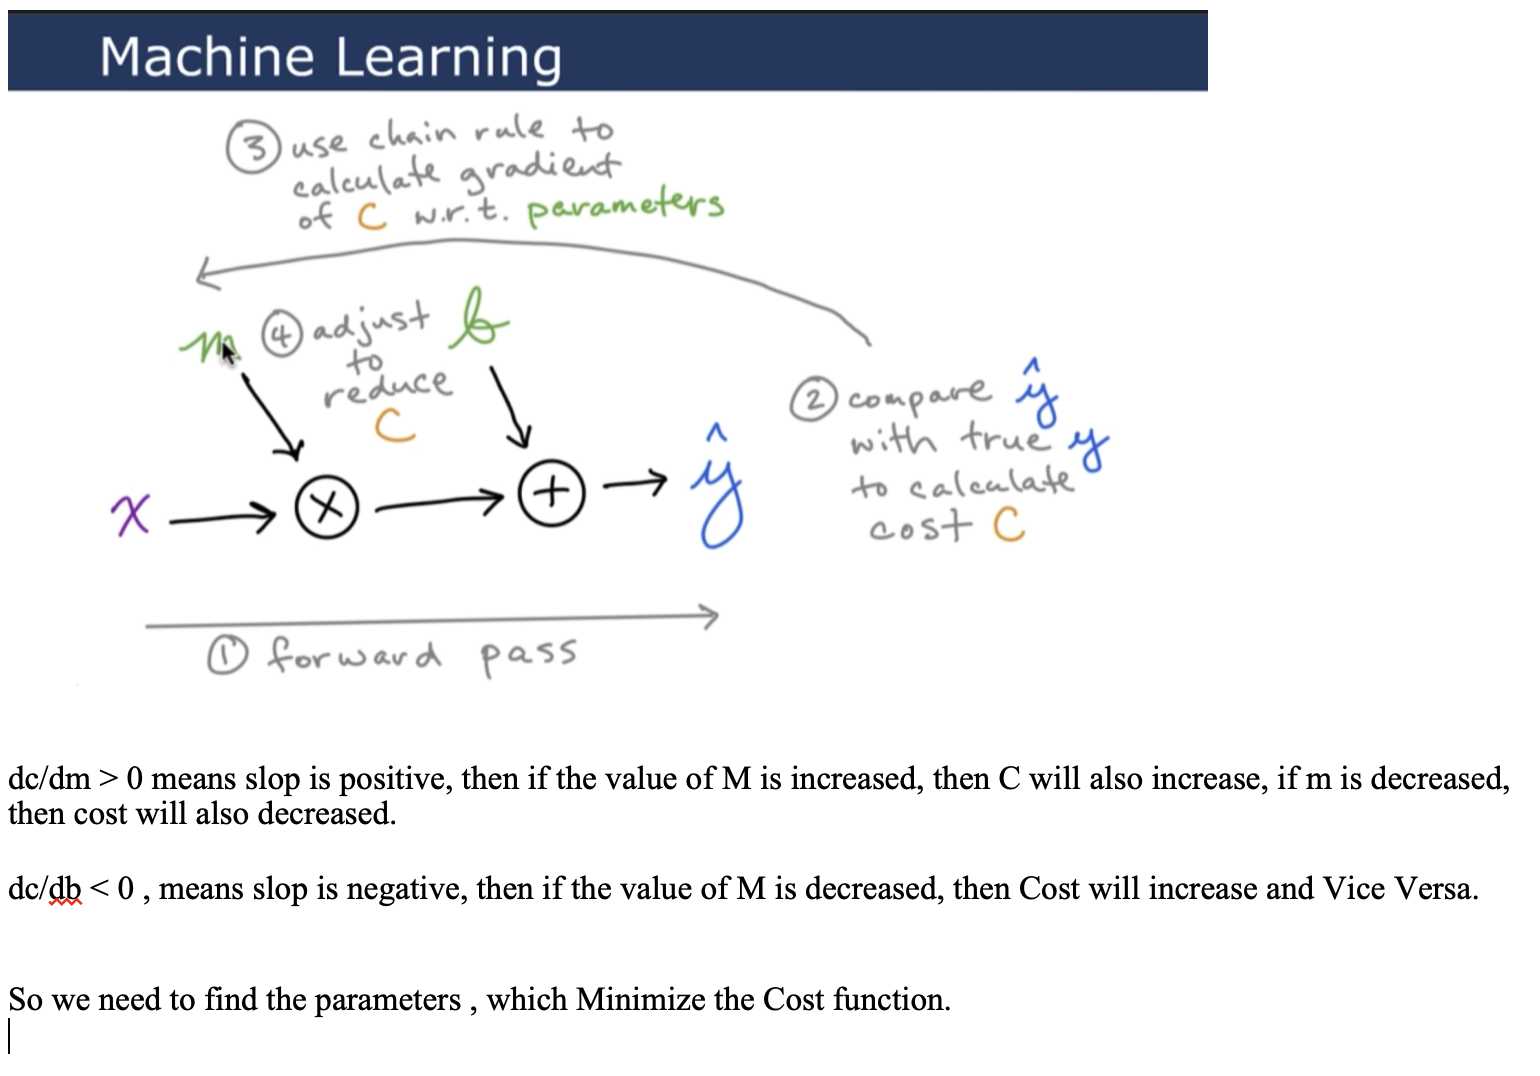 -->

<div>
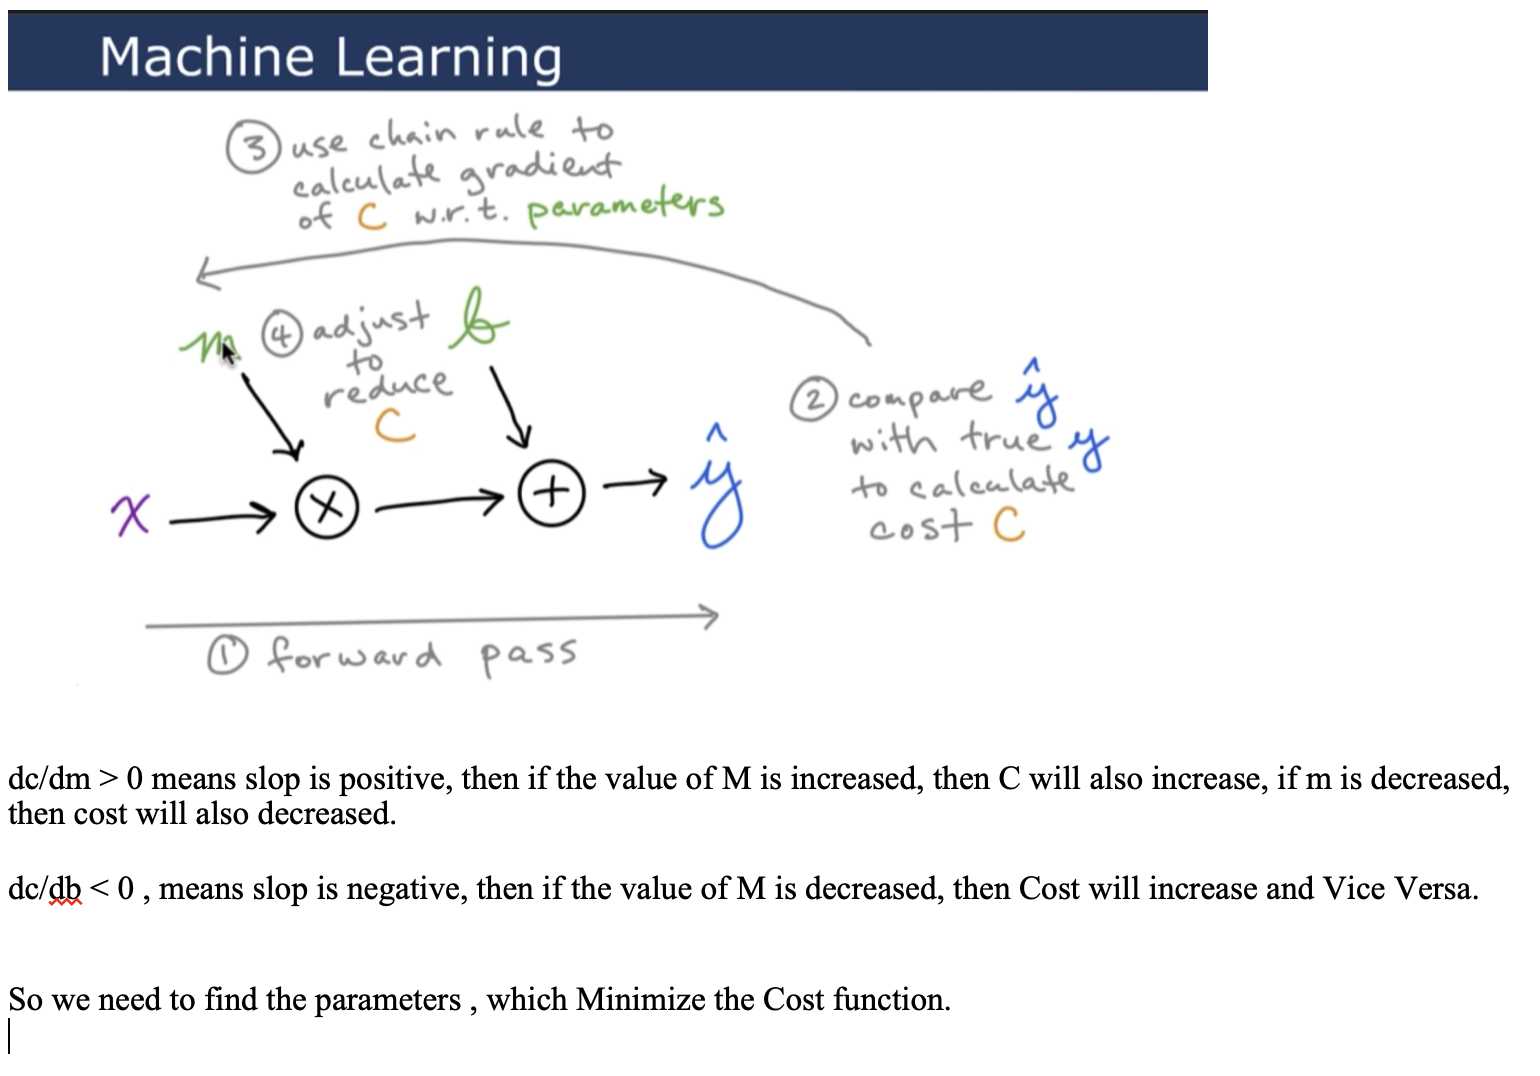
 </div>

In [187]:
m = torch.tensor([0.9]).requires_grad_()
print(m)
b = torch.tensor([0.1]).requires_grad_()
print(b)


def regression(my_x, my_m , my_b):
    return my_x * my_m + my_b

def regression_plot(my_x, my_y, my_m, my_b):
    
    fig, ax = plt.subplots()

    ax.scatter(my_x, my_y)
    
    x_min, x_max = ax.get_xlim()
    y_min = regression(x_min, my_m, my_b).detach().item()
    y_max = regression(x_max, my_m, my_b).detach().item()
    
    ax.set_xlim([x_min, x_max])
    ax.plot([x_min, x_max], [y_min, y_max])
    

tensor([0.9000], requires_grad=True)
tensor([0.1000], requires_grad=True)


In [188]:
# yhat

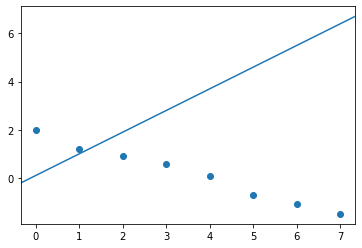

In [189]:
regression_plot(x, y, m, b)

Machine Learning

In [190]:
yhat = regression(x, m, b)

In [191]:
yhat

tensor([0.1000, 1.0000, 1.9000, 2.8000, 3.7000, 4.6000, 5.5000, 6.4000],
       grad_fn=<AddBackward0>)

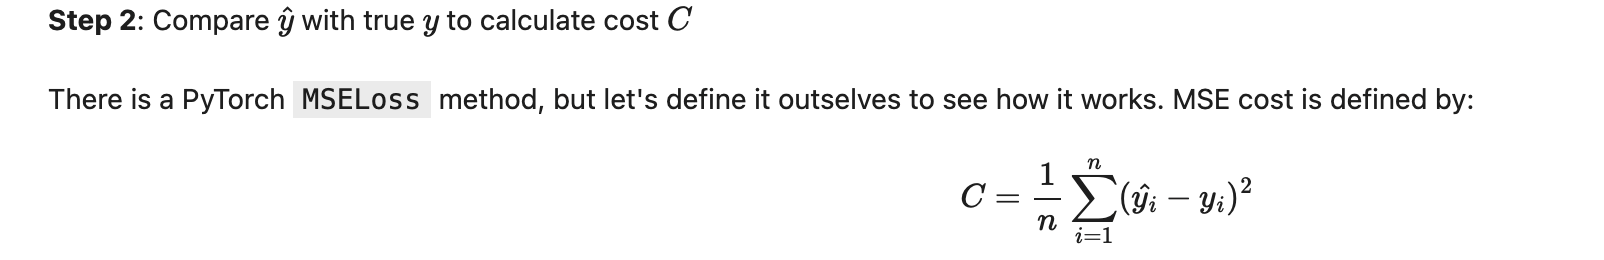

In [192]:
def mse(my_yhat, my_y): 
    sigma = torch.sum((my_yhat - my_y)**2)
    return sigma/len(my_y)

In [193]:
C = mse(yhat, y)
C

tensor(19.5548, grad_fn=<DivBackward0>)

### Step 3:  Use Autodiff to calculate gradient C w.r.t parameters

In [194]:
 C.backward()

In [195]:
m.grad

tensor([36.0493])

In [196]:
b.grad

tensor([6.1290])

### Step 4: Gradient Descent

In [197]:
# lr is the Learning Rate
optimizer = torch.optim.SGD([m,b], lr=0.01)


In [198]:
optimizer.step()

In [199]:
m

tensor([0.5395], requires_grad=True)

In [200]:
b

tensor([0.0387], requires_grad=True)

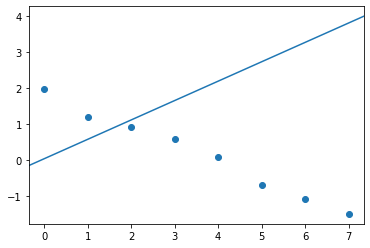

In [201]:
regression_plot(x,y,m,b)

In [202]:
c = mse(regression(x,m,b),y)

In [203]:
c

tensor(8.6163, grad_fn=<DivBackward0>)

In [204]:
epochs = 1000
for epoch in range(epochs):
    optimizer.zero_grad()
    yhat = regression(x,m,b)
    c = mse(yhat, y)
    c.backward()
    optimizer.step()
    print('Epoch {}, cost {}, m grad {}, b grad{}'.format(epoch, '%.3g' %c.item(),  '%.3g' %m.grad.item(), '%.3g' %b.grad.item() ))
    

Epoch 0, cost 8.62, m grad 23, b grad3.48
Epoch 1, cost 4.19, m grad 14.7, b grad1.8
Epoch 2, cost 2.39, m grad 9.43, b grad0.737
Epoch 3, cost 1.65, m grad 6.08, b grad0.0623
Epoch 4, cost 1.35, m grad 3.95, b grad-0.365
Epoch 5, cost 1.22, m grad 2.59, b grad-0.634
Epoch 6, cost 1.16, m grad 1.73, b grad-0.802
Epoch 7, cost 1.13, m grad 1.18, b grad-0.907
Epoch 8, cost 1.11, m grad 0.831, b grad-0.972
Epoch 9, cost 1.09, m grad 0.608, b grad-1.01
Epoch 10, cost 1.08, m grad 0.466, b grad-1.03
Epoch 11, cost 1.06, m grad 0.375, b grad-1.04
Epoch 12, cost 1.05, m grad 0.317, b grad-1.05
Epoch 13, cost 1.04, m grad 0.28, b grad-1.05
Epoch 14, cost 1.03, m grad 0.255, b grad-1.05
Epoch 15, cost 1.02, m grad 0.239, b grad-1.05
Epoch 16, cost 1, m grad 0.229, b grad-1.04
Epoch 17, cost 0.993, m grad 0.222, b grad-1.04
Epoch 18, cost 0.982, m grad 0.217, b grad-1.03
Epoch 19, cost 0.97, m grad 0.213, b grad-1.03
Epoch 20, cost 0.959, m grad 0.21, b grad-1.02
Epoch 21, cost 0.949, m grad 0.2

Epoch 750, cost 0.0165, m grad 0.00305, b grad-0.015
Epoch 751, cost 0.0165, m grad 0.00303, b grad-0.0149
Epoch 752, cost 0.0165, m grad 0.00302, b grad-0.0148
Epoch 753, cost 0.0165, m grad 0.003, b grad-0.0147
Epoch 754, cost 0.0165, m grad 0.00298, b grad-0.0147
Epoch 755, cost 0.0165, m grad 0.00296, b grad-0.0146
Epoch 756, cost 0.0165, m grad 0.00295, b grad-0.0145
Epoch 757, cost 0.0165, m grad 0.00293, b grad-0.0144
Epoch 758, cost 0.0165, m grad 0.00291, b grad-0.0143
Epoch 759, cost 0.0165, m grad 0.0029, b grad-0.0142
Epoch 760, cost 0.0165, m grad 0.00288, b grad-0.0142
Epoch 761, cost 0.0165, m grad 0.00286, b grad-0.0141
Epoch 762, cost 0.0165, m grad 0.00285, b grad-0.014
Epoch 763, cost 0.0165, m grad 0.00283, b grad-0.0139
Epoch 764, cost 0.0165, m grad 0.00281, b grad-0.0138
Epoch 765, cost 0.0165, m grad 0.0028, b grad-0.0138
Epoch 766, cost 0.0165, m grad 0.00278, b grad-0.0137
Epoch 767, cost 0.0165, m grad 0.00277, b grad-0.0136
Epoch 768, cost 0.0165, m grad 0.0

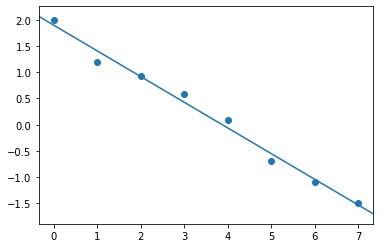

In [205]:
regression_plot(x,y,m,b)